In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

xls = pd.ExcelFile('/content/drive/My Drive/matrix.xlsx')
r_table = pd.read_excel(xls, 'Sheet3',index_col=0)
state_value_function = pd.read_excel(xls, 'Sheet2')
transition_matrix = pd.read_excel(xls, 'Sheet4',index_col=0)


Mounted at /content/drive


In [2]:
r_table

,A,B,C,D,E,F,G,H,I,J,...,P,Q,R,S,T,U,V,W,X,Y
A,-1.0,-1.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,-1.0,-1.0,-1.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,-1.0,-1.0,-1.0,NaN,NaN,NaN,-100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,-1.0,-1.0,-100.0,NaN,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,-1.0,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0,-100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-100.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,NaN,NaN,NaN,NaN,-100.0,NaN,NaN,NaN,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import numpy as np
from random import sample
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
import math
import collections

In [4]:

total_episodes = 500 
number_of_steps = 20 

epsilon = 1 
epsilon_min = 0.1 
decay_rate = 0.996 


alpha = 0.3 
gamma = 0.99 

#Initialization of the Q matrix
q_table = pd.DataFrame(np.matrix(np.zeros([25,4])).astype("float32"), columns = transition_matrix.columns, index = transition_matrix.index)
q_table.head()

,UP,DOWN,RIGHT,LEFT
A,0.0,0.0,0.0,0.0
B,0.0,0.0,0.0,0.0
C,0.0,0.0,0.0,0.0
D,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0


In [5]:
optimal_state_value_function = np.array(state_value_function)
optimal_state_value_function

array([[-8., -7., -6., -5.,  0.],
       [-7., -6.,  0., -4., -3.],
       [ 0., -5., -4., -3., -2.],
       [-1., -4., -3., -2.,  0.],
       [ 0., -3., -2., -1.,  0.]])

In [6]:
def e_greedy_decay_policy(state, epsilon):  #inspiraion from labs and https://github.com/Kimonili/Qlearning_DDDQN-reinforcement_learning/blob/master/qlearning_policies/q_learning_boltzmann_custom_env.ipynb
    exploration_threshold = np.random.uniform(0,1)
    actions_list = ["UP", "DOWN", "RIGHT", "LEFT"]
 
    if (exploration_threshold >= epsilon):
        
        action = q_table.loc[state, :].argmax()
         
    else:
        
        action = sample(actions_list, 1)[0]
    return action

In [7]:
def execute_action(state, action):
    next_state = transition_matrix.loc[state,action] e
    reward = r_table.loc[state, next_state]
    end_episode_states = ['E', 'H', 'K', 'U', 'T','Y']
    done = False 
    if (next_state in end_episode_states):
        done = True
    print('Current state', state)
    print('Next state', next_state)
    print ('Done', done)
    
    
    return next_state, reward, done

In [8]:
#Update Q
def update_Q(current_state, next_state, action, reward, alpha, gamma):
    q_old = q_table.loc[current_state, action] #OLD Q value
    q_new = q_old + alpha * (reward + gamma * max(q_table.loc[next_state,:] - q_old))
    
    q_table.loc[current_state, action] = q_new
    
    print('Old Q value:       ', q_old)
    print('Updated Q value (Q new): ', q_new)
    print("test",reward + gamma)# * max(q_table.loc[next_state,:] - q_old))

In [9]:
#Training the agent
sum_reward = 0

episodes_rewards_list = []
window = 100
average_reward = deque(maxlen=total_episodes)
best_average_reward = -math.inf
check_rewards = deque(maxlen=window)

#EPISODES
for episode in range(1, total_episodes + 1):
    current_state = 'A'
    episode_reward = 0
    for step in range (number_of_steps):
        action = e_greedy_decay_policy(current_state, epsilon)
        
        next_state, reward, done = execute_action(current_state, action)
        
        update_Q(current_state, next_state, action, reward, alpha, gamma)
        current_state = next_state
        
        episode_reward += reward 
        
        if done:
            check_rewards.append(episode_reward)
            break

    if episode >= 100:
        average_reward = np.mean(check_rewards)
        if average_reward > best_average_reward:
            best_average_reward = average_reward
    print("\rEpisode {}/{} || Best average reward {}".format(episode, total_episodes, best_average_reward), end="")

    
    if best_average_reward > 83:
        print('\nThe environment is solved in {} episodes.'.format(episode-1), end = "")
        break
    
    episodes_rewards_list.append(episode_reward)
    print("\rThe reward for this episode is: {}".format(episode_reward))
    
    episode_reward = 0

Streaming output truncated to the last 5000 lines.
Old Q value:        -2.8760238
Updated Q value (Q new):  -2.865283931016922
test -0.010000000000000009
Current state B
Next state B
Done False
Old Q value:        -2.8818464
Updated Q value (Q new):  -2.8699537031650544
test -0.010000000000000009
Current state B
Next state A
Done False
Old Q value:        -3.9193501
Updated Q value (Q new):  -3.910645043373108
test -0.010000000000000009
Current state A
Next state A
Done False
Old Q value:        -3.9344945
Updated Q value (Q new):  -3.922790810585022
test -0.010000000000000009
Current state A
Next state A
Done False
Old Q value:        -3.8949835
Updated Q value (Q new):  -3.8911030163764955
test -0.010000000000000009
Current state A
Next state A
Done False
Old Q value:        -3.891103
Updated Q value (Q new):  -3.887990854740143
test -0.010000000000000009
Current state A
Next state B
Done False
Old Q value:        -2.865284
Updated Q value (Q new):  -2.856670608758926
test -0.0100000

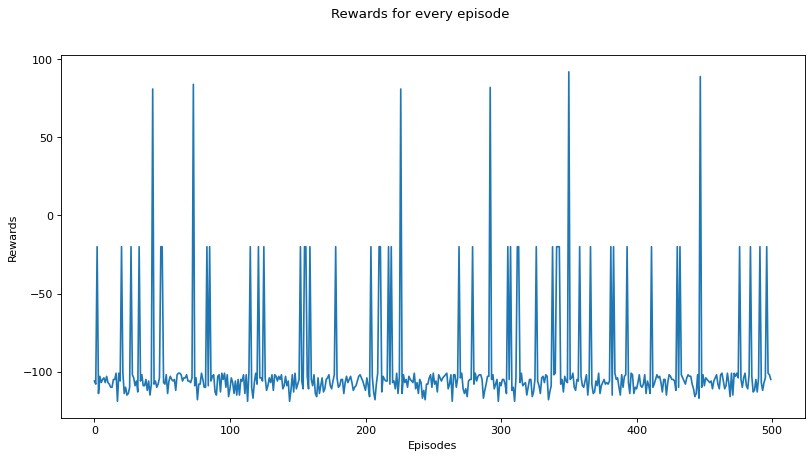

In [10]:

reward_per_episode = pd.DataFrame(np.asarray(episodes_rewards_list)) 
reward_per_episode['episodes'] = reward_per_episode.index
reward_per_episode.columns = ['total_reward', 'episodes']


plt.figure(figsize=(12, 6), dpi=80)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.suptitle('Rewards for every episode')
plt.plot(reward_per_episode['episodes'], reward_per_episode['total_reward'])